In [1]:
# Run this cell first
import os
import cv2
import json
from pathlib import Path
from PIL import Image
from dotenv import load_dotenv
load_dotenv()
TEAM_NAME, TEAM_TRACK = os.getenv("TEAM_NAME"), os.getenv("TEAM_TRACK")
on_gcp = None not in [TEAM_NAME, TEAM_TRACK]

### Truth bounding box
Shows the actual bounding boxes of all objects in an image from the test dataset.

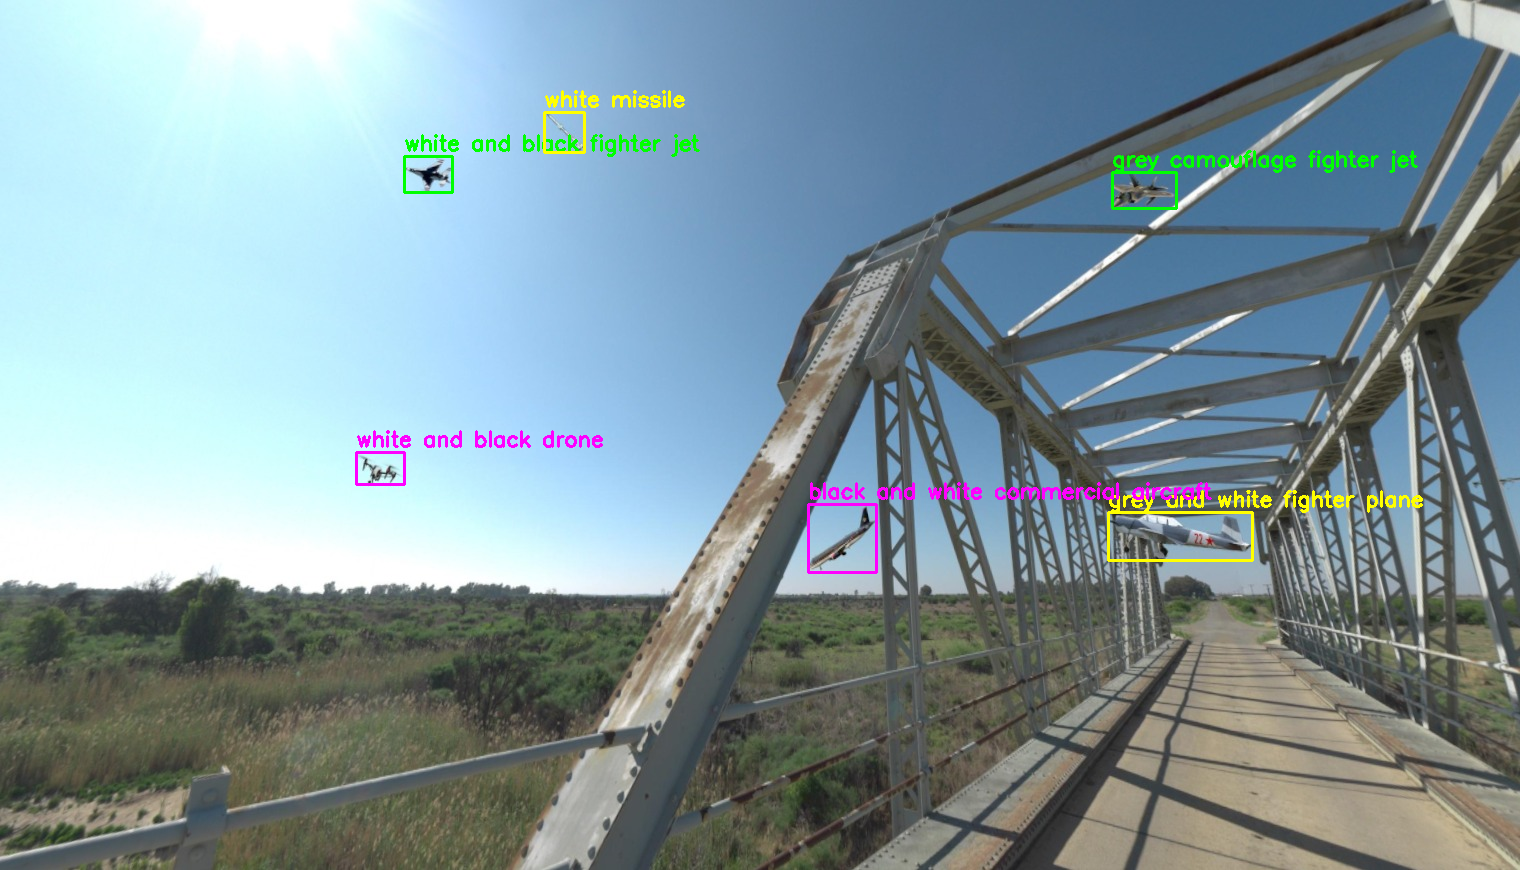

In [4]:
# View bounding box for image based on vlm.jsonl
# Set image number here
image_no = 1
if on_gcp:
    path = Path(f"/home/jupyter/advanced/images/image_{image_no}.jpg")
    jsonl = Path("/home/jupyter/advanced/vlm.jsonl")
else:
    path = Path(f"advanced/images/image_{image_no}.jpg")
    jsonl = Path("advanced/vlm.jsonl")
with open(jsonl) as f:
    for i, line in enumerate(f):
        if i == int(image_no):
            data = json.loads(line)
            break
colours = [(0, 255, 0), (0, 255, 255), (255, 0, 255)]
n = min(len(colours), len(data["annotations"]))
image = cv2.imread(str(path))
for i, annotation in enumerate(data["annotations"]):
    l, t, w, h = annotation["bbox"]
    cv2.rectangle(image, (l, t), (l+w, t+h), colours[i % n], 2)
    cv2.putText(image, annotation["caption"], (l, max(0, t-6)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, colours[i % n], 2)
Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)).show()

### YOLOv8 Training and Testing

In [18]:
from ultralytics import YOLO
YOLO_MODEL = "yolov8x.pt"
yolo_model = YOLO(YOLO_MODEL)

In [41]:
# Training
yolo_model.train(data="datasets/yolov8/data.yaml",
                 epochs=3,
                 batch=-1,
                 save_period=1,
                 imgsz=640,
                 project="nlp/models/YOLOv8",
                 name=YOLO_MODEL,
                 exist_ok=True)

New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=datasets/yolov8/data.yaml, epochs=3, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=nlp/models/YOLOv8, name=yolov8x.pt, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

train: Scanning /home/lunarbunny/til-24-siewsugar/datasets/yolov8/labels/train... 5101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5101/5101 [00:04<00:00, 1198.22it/s]


train: New cache created: /home/lunarbunny/til-24-siewsugar/datasets/yolov8/labels/train.cache


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

val: New cache created: /home/lunarbunny/til-24-siewsugar/datasets/yolov8/labels/val.cache



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The

Plotting labels to nlp/models/YOLOv8/yolov8x.pt/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000111, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to nlp/models/YOLOv8/yolov8x.pt
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/319 [00:00<?, ?it/s]/home/lunarbunny/til-24-siewsugar/.venv/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        1/3      15.5G      1.169      5.767     0.9008        170        640:   2%|▏         | 5/319 [01:26<1:30:01, 17.20s/it]


KeyboardInterrupt: 

/home/lunarbunny/til-24-siewsugar/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


image 1/1 /home/lunarbunny/til-24-siewsugar/advanced/images/image_0.jpg: 384x640 4 airplanes, 1 boat, 91.5ms
Speed: 1.4ms preprocess, 91.5ms inference, 569.4ms postprocess per image at shape (1, 3, 384, 640)


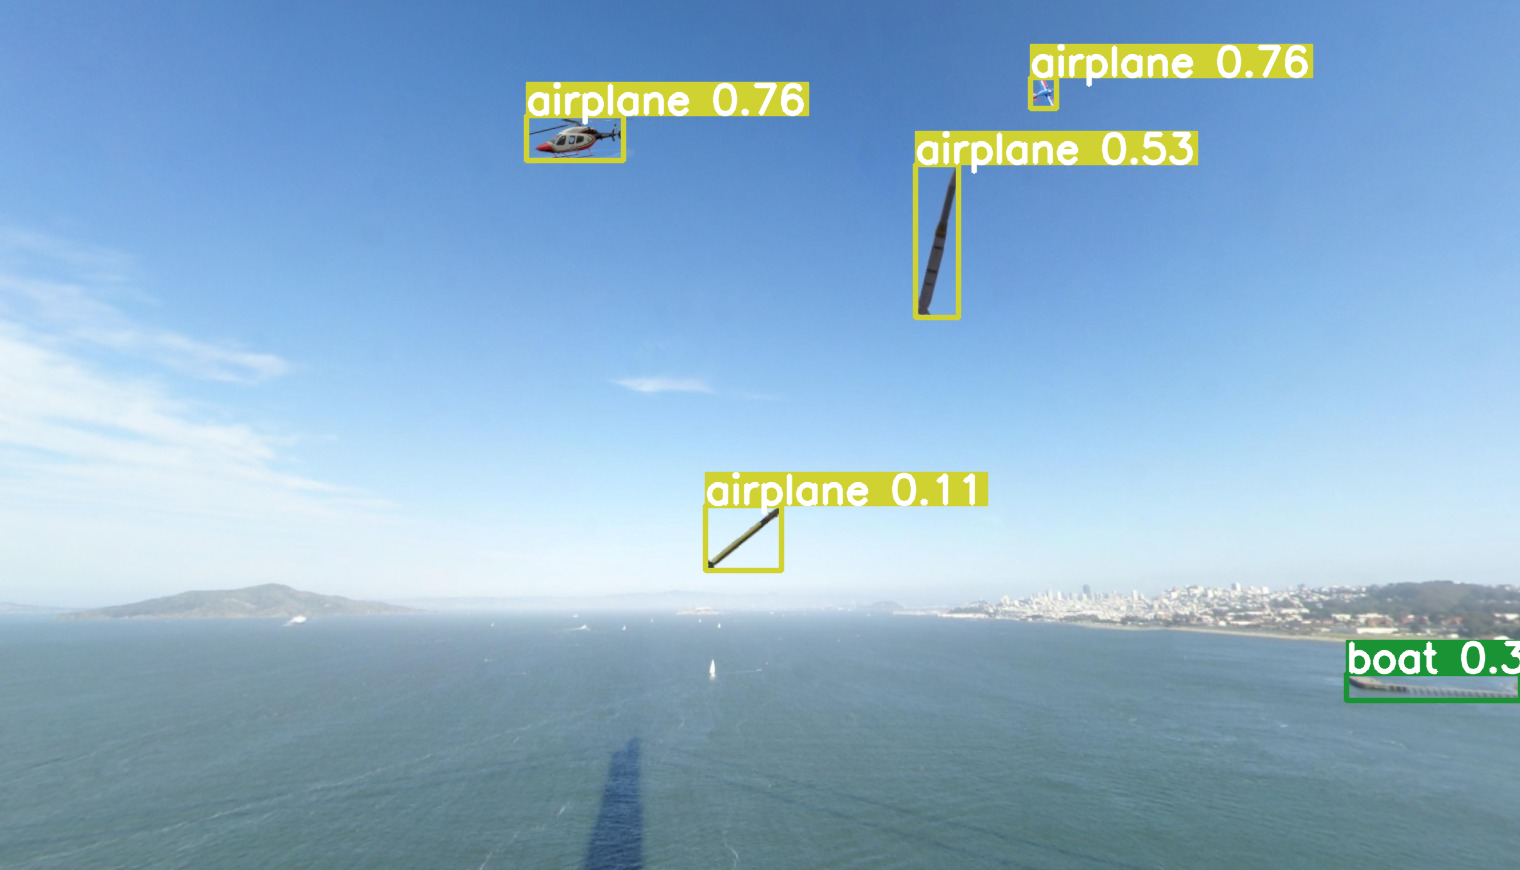

1043.8125 92.921875 26.125 31.46875


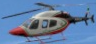

575.046875 138.046875 96.78125 44.53125


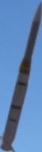

936.9375 240.765625 42.75 152.59375


1433.3125 686.96875 173.375 27.3125


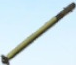

743.375 537.9375 76.0 65.3125


In [5]:
# Inference
image_no = 0
yolo_result = yolo_model(f"advanced/images/image_{image_no}.jpg", half=True, conf=0.1)[0]
yolo_objects = []
yolo_result.show() # Show annotated image

for box in yolo_result.boxes.xywh:
    # Box is a Tensor of [x, y, w, h]
    x, y, w, h = box.tolist()
    # Crop bounding boxes from orginal image
    top, left = round(y-(h/2)), round(x-(w/2))
    cropped = yolo_result.orig_img[top:int(top+h), left:int(left+w), ::-1] # BGR to RGB
    Image.fromarray(cropped).show()
    print(x, y, w, h)
    yolo_objects.append(cropped)


/home/lunarbunny/til-24-siewsugar/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


The best matching image is:


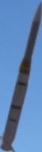

In [6]:
import torch
from transformers import CLIPProcessor, CLIPModel

MODEL = "openai/clip-vit-base-patch32"
# MODEL = "openai/clip-vit-large-patch14"

device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model = CLIPModel.from_pretrained(MODEL).to(device)
clip_processor = CLIPProcessor.from_pretrained(MODEL)

# caption = "grey missile"
# caption = "green and black missile"
caption = "grey and white fighter plane"

inputs = clip_processor(text=caption, images=yolo_objects, return_tensors="pt", padding=True).to(device)

with torch.no_grad():
    outputs = clip_model(**inputs)
logits_per_image = outputs.logits_per_image # image-text similarity score
most_similar_idx = logits_per_image.argmax(dim=0).item()

print(f"The best matching image is:")
Image.fromarray(yolo_objects[most_similar_idx]).show()

tensor([[24.1034, 27.5231, 25.3963, 26.5675, 22.1214]], device='cuda:0', grad_fn=<TBackward0>)
tensor([[0.0212, 0.6489, 0.0774, 0.2496, 0.0029]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
The best matching description is: [1] white, red, and green fighter plane


tensor([[28.2303, 23.4363, 23.5405, 24.7318, 18.7352]], device='cuda:0', grad_fn=<TBackward0>)
tensor([[9.5439e-01, 7.9018e-03, 8.7697e-03, 2.8863e-02, 7.1795e-05]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
The best matching description is: [0] yellow, red, and grey helicopter


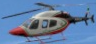

tensor([[24.2021, 22.9037, 23.9632, 23.2428, 22.7082]], device='cuda:0', grad_fn=<TBackward0>)
tensor([[0.3748, 0.1023, 0.2952, 0.1436, 0.0841]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
The best matching description is: [0] yellow, red, and grey helicopter


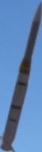

tensor([[21.8780, 22.5663, 23.3809, 22.4647, 20.1006]], device='cuda:0', grad_fn=<TBackward0>)
tensor([[0.1058, 0.2106, 0.4755, 0.1902, 0.0179]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
The best matching description is: [2] white cargo aircraft


tensor([[19.1589, 19.7107, 20.8534, 19.2309, 20.2562]], device='cuda:0', grad_fn=<TBackward0>)
tensor([[0.0816, 0.1417, 0.4444, 0.0877, 0.2446]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
The best matching description is: [2] white cargo aircraft


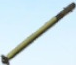

In [7]:
import torch
from transformers import CLIPProcessor, CLIPModel

device = "cuda" if torch.cuda.is_available() else "cpu"
yolo_model = CLIPModel.from_pretrained(MODEL).to(device)
clip_processor = CLIPProcessor.from_pretrained(MODEL)

text=["yellow, red, and grey helicopter", "white, red, and green fighter plane", "white cargo aircraft", "orange light aircraft", "white and black fighter jet"]

for obj in yolo_objects:
    inputs = clip_processor(text=text, images=obj, return_tensors="pt", padding=True).to(device)

    outputs = yolo_model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
    print(logits_per_image)
    print(probs)
    image_embeds = outputs.image_embeds
    text_embeds = outputs.text_embeds
    cosine_sim = torch.nn.functional.cosine_similarity(image_embeds, text_embeds)
    best_match_idx = torch.argmax(cosine_sim).item()
    
    print(f"The best matching description is: [{best_match_idx}] {text[best_match_idx]}")
    Image.fromarray(obj).show()


### YOLOv8 Training Data Generation and Analysis on vlm.jsonl

In [2]:
from tqdm import tqdm

if on_gcp:
    # For running on GCP
    input_dir = Path(f"/home/jupyter/{TEAM_TRACK}")
    results_dir = Path(f"/home/jupyter/{TEAM_NAME}")
else:
    # For running locally
    input_dir = Path("advanced")
    results_dir = Path("results")
results_dir.mkdir(parents=True, exist_ok=True)

truths = []
with open(input_dir / "vlm.jsonl", "r") as f:
    for idx, line in enumerate(tqdm(f, desc="Reading vlm.jsonl")):
        if line.strip() == "":
            continue
        instance = json.loads(line.strip())
        for annotation in instance["annotations"]:
            truths.append(
                {
                    "image": instance["image"],
                    "caption": annotation["caption"],
                    "bbox": annotation["bbox"],
                }
            )

Reading vlm.jsonl: 5107it [00:00, 99362.69it/s]


In [3]:
# Generate training dataset for YOLOv8
from itertools import groupby
import shutil
import random

OUT_IMG_DIR = Path("datasets/yolov8/images")
OUT_LBL_DIR = Path("datasets/yolov8/labels")
OUT_IMG_TRN_DIR, OUT_LBL_TRN_DIR = OUT_IMG_DIR / "train", OUT_LBL_DIR / "train"
OUT_IMG_VAL_DIR, OUT_LBL_VAL_DIR = OUT_IMG_DIR / "val", OUT_LBL_DIR / "val"
TRAIN_TEST_SPLIT = 0.8
JPG_RESOLUTION = (1520, 870)
os.makedirs(OUT_IMG_TRN_DIR, exist_ok=True)
os.makedirs(OUT_LBL_TRN_DIR, exist_ok=True)
os.makedirs(OUT_IMG_VAL_DIR, exist_ok=True)
os.makedirs(OUT_LBL_VAL_DIR, exist_ok=True)

# Shuffle and split the dataset into training and testing
images_annotations = {}
for image_file, annotations in groupby(truths, key=lambda x: x["image"]):
    images_annotations[image_file] = list(annotations)
all_images = list(images_annotations.keys())
random.shuffle(all_images)
split_index = int(len(all_images) * TRAIN_TEST_SPLIT)
train_images = all_images[:split_index]
test_images = all_images[split_index:]

def save_yolo_dataset(images, images_dir, labels_dir):
    for image_file in images:
        image_path = input_dir / "images" / image_file
        if not image_path.exists():
            print(f"The file {image_file} does not exist.")
            continue

        # For every image, create a text file with the bounding box annotations
        # Format: class x_center y_center width height
        labels = []
        for anno in images_annotations[image_file]:
            # Convert l, t, w, h to x_center, y_center, w, h
            l, t, w, h = anno["bbox"]
            x = (l + w // 2) / JPG_RESOLUTION[0]
            y = (t + h // 2) / JPG_RESOLUTION[1]
            w /= JPG_RESOLUTION[0]
            h /= JPG_RESOLUTION[1]

            # Extract the object's class from the caption
            # See yolov8/dataset.yaml for the class mapping
            if "aircraft" in anno["caption"]:
                class_id = 80
            elif "drone" in anno["caption"]:
                class_id = 81
            elif "helicopter" in anno["caption"]:
                class_id = 82
            elif "fighter plane" in anno["caption"]:
                class_id = 83
            elif "fighter jet" in anno["caption"]:
                class_id = 84
            elif "missile" in anno["caption"]:
                class_id = 85
            else:
                print(f"Unknown class for caption {anno['caption']} ({anno['image']})")
                continue

            labels.append(f"{class_id} {x} {y} {w} {h}\n")

        # Write the labels to file
        with open(labels_dir / f"{anno['image'][:-4]}.txt", "w") as f:
            f.writelines(labels)

        # Copy the image to the training directory
        shutil.copy(image_path, images_dir)

save_yolo_dataset(train_images, OUT_IMG_TRN_DIR, OUT_LBL_TRN_DIR)
save_yolo_dataset(test_images, OUT_IMG_VAL_DIR, OUT_LBL_VAL_DIR)

In [10]:
# List the most common words from the captions
import pandas as pd
from collections import Counter

words_generator = (truth["caption"].split() for truth in truths)
word_freq = Counter(word.replace(',', '') for words in words_generator for word in words)
word_freq.pop("and")
df = pd.DataFrame(word_freq.most_common(), columns=["word", "freq"])
print(df.to_string(index=False))

      word  freq
     white 10598
   fighter  9443
  aircraft  8290
     black  7058
       red  6294
      blue  6240
      grey  5906
     plane  5364
helicopter  5309
    yellow  5148
     green  4463
       jet  4079
     light  3474
commercial  3163
   missile  2914
camouflage  2162
     drone  1957
     cargo  1653
    orange  1220
     brown   956
    silver   483
